In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
ad1=sc.read_h5ad("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control/data/AD.h5ad")
genes1=ad1.var_names

ad2=sc.read_h5ad("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control/data/all_brain_regions_filt_preprocessed_scanpy_fullmatrix.h5ad")
genes2=ad2.var_names

In [3]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector

# Ensure required R packages are installed
utils = importr("utils")
utils.chooseCRANmirror(ind=1)  # Select a CRAN mirror
importr("org.Hs.eg.db")
importr("AnnotationDbi")

# Define the R function in Python
ro.r('''
library(org.Hs.eg.db)
library(AnnotationDbi)

convert_ensg_to_gene_name_local <- function(ensg_vector) {
  gene_names <- mapIds(
    org.Hs.eg.db,
    keys = ensg_vector,
    column = "SYMBOL",
    keytype = "ENSEMBL",
    multiVals = "first"
  )
  result <- data.frame(ENSG_ID = ensg_vector, Gene_Name = gene_names, stringsAsFactors = FALSE)
  return(result)
}
''')

# Python function to call the R function
def convert_ensg_to_gene_name(ensg_list):
    r_convert_func = ro.globalenv['convert_ensg_to_gene_name_local']
    r_result = r_convert_func(StrVector(ensg_list))
    
    # Extract the "Gene_Name" column by index or use .rx2() with column name
    gene_names = list(r_result.rx2("Gene_Name"))
    return gene_names

# Example usage
ensg_ids = ["ENSG00000139618", "ENSG00000227232", "ENSG00000157764"]
gene_names = convert_ensg_to_gene_name(ensg_ids)
print(gene_names)

Unable to determine R library path: Command '('/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 127.
R[write to console]: Error in (function ()  : 
  org.Hs.egPFAM is defunct. Please use select() if you need access to
  PFAM or PROSITE accessions.

/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/packages.py:263: UserWarning: R C-API Rf_findVarInFrame()
  warn(str(rre))
R[write to console]: Error in (function ()  : 
  org.Hs.egPROSITE is defunct. Please use select() if you need access to
  PFAM or PROSITE accessions.

R[write to console]: 'select()' returned 1:1 mapping between keys and columns



['BRCA2', NA_character_, 'BRAF']


In [6]:
genes11=convert_ensg_to_gene_name(ad1.var_names.tolist())

intersection0=list(set(genes11) & set(ad2.var_names.tolist()))
print(len(intersection0),intersection0)

R[write to console]: 'select()' returned 1:many mapping between keys and columns



1360 ['ADH1B', 'SLC44A1', 'CD3D', 'SLC12A7', 'ARHGAP24', 'MX2', 'SV2C', 'PLCH1', 'AIF1L', 'ZNF98', 'B4GALT1', 'CNTN2', 'CEACAM4', 'ADORA3', 'PSD2', 'ZFP36L1', 'ID3', 'HK2', 'SLC9A9', 'STX11', 'SLFN12L', 'LYZ', 'KIF19', 'HMOX1', 'ELF1', 'TAGLN2', 'ADCY7', 'AASS', 'NWD1', 'APBB1IP', 'TGFBI', 'EVA1B', 'SPON1', 'CNDP1', 'NXPH1', 'TIMP3', 'VAV3', 'SCD', 'PCK1', 'TRIM56', 'WDR49', 'ATP8B4', 'HSPA2', 'MYH11', 'TMEM235', 'LILRB5', 'RGMA', 'MT3', 'S100Z', 'MOBP', 'APOA4', 'PPP1R14A', 'DHRS9', 'RGR', 'TLR1', 'CDC42EP4', 'SEMA6A', 'MAF', 'KIT', 'TAGLN', 'CD37', 'TLR7', 'PLA1A', 'TGFB1', 'FOXD1', 'SOWAHD', 'KCNH8', 'FGF1', 'CLDND1', 'CEBPE', 'RNASE1', 'CXCL14', 'LPAR6', 'MAML2', 'CRYAB', 'BBOX1', 'TNC', 'RASSF2', 'SLC6A13', 'LGR5', 'CPB2', 'CXCR4', 'IFNG', 'PHF21B', 'SYTL4', 'VENTX', 'SAT1', 'ACACB', 'ITK', 'SPTLC3', 'EMCN', 'GLDN', 'POSTN', 'PRDM16', 'IL1RN', 'MGP', 'NCKAP1L', 'AOAH', 'SPP1', 'CD55', 'EZR', 'SH3TC1', 'COL6A2', 'TM4SF1', 'CLEC7A', 'SERPINA4', 'PLLP', 'TBC1D16', 'SLC25A13', 'OAF', 

In [7]:
# Normalize counts per cell to 10,000 (or another target_sum)
sc.pp.normalize_total(ad2, target_sum=1e4)
# Add a pseudocount of 1 and apply log transform
sc.pp.log1p(ad2)

sc.pp.highly_variable_genes(ad2, flavor='seurat', n_top_genes=2000)

In [8]:
intersection1=list(set(intersection0) | set(ad2.var_names[ad2.var.highly_variable]))

In [9]:
print(len(intersection1), intersection1)

2314 ['SLAMF7', 'ADH1B', 'SLC44A1', 'CCDC155', 'CD3D', 'SLC12A7', 'CRNN', 'GBE1', 'CALM3', 'ARHGAP24', 'DES', 'MX2', 'SV2C', 'MCC', 'PLCH1', 'CFAP54', 'AIF1L', 'C4orf48', 'ZNF98', 'B4GALT1', 'CNTN2', 'CEACAM4', 'ADORA3', 'PSD2', 'ZFP36L1', 'ID3', 'GIMD1', 'SLC16A10', 'HK2', 'SLC9A9', 'STX11', 'SLFN12L', 'CCDC60', 'LYZ', 'CCDC88C', 'PRR16', 'KIF19', 'CA1', 'HMOX1', 'ELF1', 'BTBD11', 'POU2F2', 'TAGLN2', 'ADCY7', 'RARRES1', 'AASS', 'NWD1', 'PLEKHG1', 'APBB1IP', 'TGFBI', 'PLVAP', 'EVA1B', 'OR5AK2', 'SPON1', 'GJC1', 'CNDP1', 'NXPH1', 'DNAH5', 'AZU1', 'TIMP3', 'VAV3', 'PTPRT', 'SCD', 'AKT1S1', 'PCK1', 'TAGAP', 'TRIM56', 'WDR49', 'MTRNR2L12', 'ATP8B4', 'CSGALNACT1', 'FRAS1', 'HSPA2', 'CPNE4', 'MYH11', 'TMEM235', 'LILRB5', 'CTGF', 'RGMA', 'FMN1', 'PPP1R15A', 'MT3', 'DEFA4', 'CTSW', 'S100Z', 'MOBP', 'AC005281.1', 'VEGFC', 'UGCG', 'PRR20C', 'ISYNA1', 'OR6C3', 'TEN1', 'APOA4', 'PPP1R14A', 'SSX5', 'PRKD3', 'DHRS9', 'LGALS9B', 'EPHA6', 'SPOCD1', 'RGR', 'TLR1', 'CDC42EP4', 'GRK5', 'SEMA6A', 'RFX2', 

In [10]:
ad3=ad2[:, intersection1].copy()
ad3.raw=None

In [12]:
df_type=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control/data/all_brain_regions_filt_preprocessed_scanpy_norm.final_noMB.cell_labels.tsv",sep="\t")

/tmp/ipykernel_2488896/2125351766.py:1: DtypeWarning: Columns (10,12,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_type=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control/data/all_brain_regions_filt_preprocessed_scanpy_norm.final_noMB.cell_labels.tsv",sep="\t")


In [13]:
df_type

,lbl,U1,U2,barcode,rind,region,projid,is.doublet,col,tspcol,hcluster,hcelltype,hsubclass,major.celltype,minor.celltype,neuronal.layer,inh.subtype,neuronal.exttype,full.exttype,cell_type_high_resolution
0,168,-2.428250,8.324310,AG_AACCATGTCATTGCGA-1,AG.1,AG,50410319,False,#E31A1C,#E31A1C80,NaN,Ast,NaN,Ast,Ast,NaN,NaN,NaN,Ast,Ast DPP10
1,164,-5.414470,12.086900,AG_AACGGGATCGAGATGG-1,AG.1,AG,50410319,False,#E31A1C,#E31A1C80,NaN,Ast,NaN,Ast,Ast,NaN,NaN,NaN,Ast,Ast GRM3
2,22,-2.404900,10.881300,AG_AACGTCAAGCGTGAAC-1,AG.1,AG,50410319,False,#E31A1C,#E31A1C80,NaN,Ast,NaN,Ast,Ast,NaN,NaN,NaN,Ast,Ast GRM3
3,164,-5.492280,13.338700,AG_AAGCGAGAGGACAAGA-1,AG.1,AG,50410319,False,#E31A1C,#E31A1C80,NaN,Ast,NaN,Ast,Ast,NaN,NaN,NaN,Ast,Ast GRM3
4,100,-3.846350,12.626400,AG_AAGGTAACATGGGATG-1,AG.1,AG,50410319,False,#E31A1C,#E31A1C80,NaN,Ast,NaN,Ast,Ast,NaN,NaN,NaN,Ast,Ast GRM3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353070,184,0.669809,5.040410,TH_TTGCCTGGTACATACC-47,TH.47,TH,94430339,False,#FED9A6,#FED9A680,choroid_plexus_epithelial_cells,Vasc/Epithelia,NaN,Vasc/Epithelia,CPEC,NaN,NaN,NaN,CPEC,CPEC
1353071,131,5.291230,0.209286,TH_TTGGGATTCAACACGT-47,TH.47,TH,94430339,False,#FED9A6,#1F78B480,endothelial_cells,Vasc/Epithelia,NaN,Vasc/Epithelia,End,NaN,NaN,NaN,End,End
1353072,207,3.646170,0.957303,TH_TTGGGTAAGAGAGAAC-47,TH.47,TH,94430339,False,#FED9A6,#FED9A680,fibroblasts,Vasc/Epithelia,NaN,Vasc/Epithelia,Fib,NaN,NaN,NaN,Fib,Fib
1353073,184,0.820165,4.782530,TH_TTGTGTTGTCACGACC-47,TH.47,TH,94430339,False,#FED9A6,#FED9A680,choroid_plexus_epithelial_cells,Vasc/Epithelia,NaN,Vasc/Epithelia,CPEC,NaN,NaN,NaN,CPEC,CPEC


In [14]:
# Make sure the 'barcode' column is the index of df_type
df_type_indexed = df_type.set_index('barcode')

# Align and assign the annotation to ad3.obs
# This merges on index (barcodes) and preserves existing obs
ad3.obs = ad3.obs.join(df_type_indexed, how='left')

In [15]:
print(ad3)

AnnData object with n_obs × n_vars = 1612073 × 2314
    obs: 'obsnames', 'lbl', 'U1', 'U2', 'rind', 'region', 'projid', 'is.doublet', 'col', 'tspcol', 'hcluster', 'hcelltype', 'hsubclass', 'major.celltype', 'minor.celltype', 'neuronal.layer', 'inh.subtype', 'neuronal.exttype', 'full.exttype', 'cell_type_high_resolution'
    var: 'varnames', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [62]:
adata=ad3

for col in adata.obs.columns:
    adata.obs[col] = adata.obs[col].values.tolist()

for i in adata.obs.columns:
    tmp=adata.obs[i].values.tolist()
    print(tmp[:10])
    try:
        unique=np.unique(tmp)
        if len(unique)<100:
            print(i, len(unique), unique)
    except:
        print(i,"no",len(unique))
        continue

print(adata.X[:10,:10])
print(adata.shape)

['AG_AAACCCACAGATAAAC-1', 'AG_AAACGAAAGGCCACCT-1', 'AG_AAACGAACACAAATAG-1', 'AG_AAACGAATCCACAGGC-1', 'AG_AAACGCTCAAACACGG-1', 'AG_AAACGCTCAGAATCGG-1', 'AG_AAACGCTTCTGTTCAT-1', 'AG_AAAGGGCAGCTAATGA-1', 'AG_AAAGGGCTCGCTTGAA-1', 'AG_AAAGGTACAGACCCGT-1']
['19.0', '5.0', '74.0', '27.0', '218.0', '1.0', '133.0', '1.0', '147.0', '31.0']
['11.6311', '4.70019', '15.9262', '10.2762', '-2.02714', '5.76421', '-1.0246', '6.37519', '10.3314', '-0.806014']
['1.8016', '17.2739', '-5.05857', '-2.42843', '-1.43409', '8.87399', '-4.49295', '8.01122', '7.68617', '0.633161']
['AG.1', 'AG.1', 'AG.1', 'AG.1', 'AG.1', 'AG.1', 'AG.1', 'AG.1', 'AG.1', 'AG.1']
['AG', 'AG', 'AG', 'AG', 'AG', 'AG', 'AG', 'AG', 'AG', 'AG']
region 7 ['AG' 'EC' 'HC' 'MT' 'PFC' 'TH' 'nan']
['50410319.0', '50410319.0', '50410319.0', '50410319.0', '50410319.0', '50410319.0', '50410319.0', '50410319.0', '50410319.0', '50410319.0']
projid 49 ['10291856.0' '10383017.0' '11259716.0' '11469504.0' '11619606.0'
 '11632851.0' '11681508.0' '1236

In [63]:
print(np.unique(adata.obs["hcelltype"].values.tolist()))

['Ast' 'Exc' 'Inh' 'Mic/Immune' 'Oli' 'Opc' 'Vasc/Epithelia' 'nan']


In [64]:
adata=adata[adata.obs["region"]=="MT",].copy()
print(adata.shape)

(227412, 2314)


In [65]:
print(adata.shape)

(227412, 2314)


In [66]:
print(type(adata.obs["is.doublet"][0]))

<class 'str'>


/tmp/ipykernel_2488896/1284202755.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(type(adata.obs["is.doublet"][0]))


In [75]:
print(np.unique(adata.obs["is.doublet"].values.tolist()))
adata=adata[adata.obs["is.doublet"]=="False",].copy()
print(adata.shape)

['False']
(227412, 2314)


In [76]:
print(np.unique(adata.obs["projid"].values.tolist()))
adata=adata[adata.obs["projid"]!="nan",].copy()
print(adata.shape)

[10291856 10383017 11259716 11469504 11619606 11632851 11681508 12365619
 15413198 15483818 20151388 20399274 20584923 20646778 20780035 20906079
 21001771 21171080 21272396 31509843 37030589 37178462 41773404 50105301
 50106280 50109639 50301125 50400709 50403446 50410319 61827429 62404688
 65652206 66754397 67429065 68539908 70625336 70816595 76733461 77891596
 78452313 82317494 83034844 86934089 90780976 91444029 94430339 98953007]
(227412, 2314)


In [69]:
print(np.unique(adata.obs["projid"]))

['10291856.0' '10383017.0' '11259716.0' '11469504.0' '11619606.0'
 '11632851.0' '11681508.0' '12365619.0' '15413198.0' '15483818.0'
 '20151388.0' '20399274.0' '20584923.0' '20646778.0' '20780035.0'
 '20906079.0' '21001771.0' '21171080.0' '21272396.0' '31509843.0'
 '37030589.0' '37178462.0' '41773404.0' '50105301.0' '50106280.0'
 '50109639.0' '50301125.0' '50400709.0' '50403446.0' '50410319.0'
 '61827429.0' '62404688.0' '65652206.0' '66754397.0' '67429065.0'
 '68539908.0' '70625336.0' '70816595.0' '76733461.0' '77891596.0'
 '78452313.0' '82317494.0' '83034844.0' '86934089.0' '90780976.0'
 '91444029.0' '94430339.0' '98953007.0']


In [70]:
df_meta=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control/data/ROSMAP_clinical.csv")

In [71]:
df_meta

,projid,Study,msex,educ,race,spanish,apoe_genotype,age_at_visit_max,age_first_ad_dx,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,pmi,braaksc,ceradsc,cogdx,dcfdx_lv,individualID
0,10101589,ROS,1.0,20.0,1.0,2.0,34.0,90+,90+,90+,18.0,5.0,9.916667,4.0,2.0,4.0,4.0,R6939144
1,86767530,MAP,0.0,10.0,1.0,2.0,33.0,90+,90+,90+,18.0,10.0,6.500000,4.0,2.0,4.0,4.0,R3893503
2,9650662,MAP,0.0,15.0,1.0,2.0,23.0,90+,90+,90+,0.0,0.0,3.850000,3.0,2.0,4.0,4.0,R8937093
3,50402855,MAP,0.0,21.0,1.0,2.0,33.0,90+,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,1.0,R7139444
4,20544321,ROS,0.0,16.0,1.0,2.0,23.0,90+,90+,NaN,13.0,14.0,NaN,NaN,NaN,NaN,4.0,R4971237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,22207815,ROS,0.0,18.0,2.0,2.0,23.0,57.653661875427787,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,1.0,R5306025
3580,22207941,ROS,0.0,16.0,2.0,2.0,34.0,56.651608487337441,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,1.0,R6142763
3581,49333806,MAP,0.0,12.0,2.0,2.0,NaN,56.599589322381931,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,1.0,R4468842
3582,59720188,MAP,0.0,13.0,1.0,1.0,NaN,54.622861054072551,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,1.0,R9446033


In [72]:
# Convert to float first (if not already), then to int
adata.obs['projid'] = adata.obs['projid'].astype(float).astype(int)

# Make sure df_meta['projid'] is also int
df_meta['projid'] = df_meta['projid'].astype(int)

# Merge into adata.obs (many-to-one join on 'projid')
adata.obs = adata.obs.merge(df_meta, on='projid', how='left')

print(adata)

AnnData object with n_obs × n_vars = 227412 × 2314
    obs: 'obsnames', 'lbl', 'U1', 'U2', 'rind', 'region', 'projid', 'is.doublet', 'col', 'tspcol', 'hcluster', 'hcelltype', 'hsubclass', 'major.celltype', 'minor.celltype', 'neuronal.layer', 'inh.subtype', 'neuronal.exttype', 'full.exttype', 'cell_type_high_resolution', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID'
    var: 'varnames', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


In [73]:
def map_condition(x):
    if x in [1, 2]:
        return 'no_dementia'
    elif x in [4, 5]:
        return 'dementia'
    else:
        return 'unknown'

# Apply the mapping
adata.obs['condition'] = adata.obs['cogdx'].apply(map_condition)

In [74]:
adata = adata[adata.obs['condition'] != 'unknown'].copy()

print(adata)

AnnData object with n_obs × n_vars = 227412 × 2314
    obs: 'obsnames', 'lbl', 'U1', 'U2', 'rind', 'region', 'projid', 'is.doublet', 'col', 'tspcol', 'hcluster', 'hcelltype', 'hsubclass', 'major.celltype', 'minor.celltype', 'neuronal.layer', 'inh.subtype', 'neuronal.exttype', 'full.exttype', 'cell_type_high_resolution', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID', 'condition'
    var: 'varnames', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [77]:
# PCA
sc.tl.pca(adata, svd_solver='arpack')

sc.pp.neighbors(adata)  # adjust as needed
sc.tl.umap(adata)

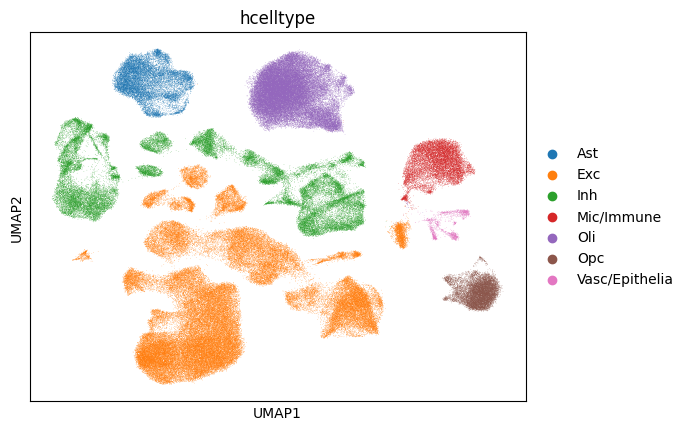

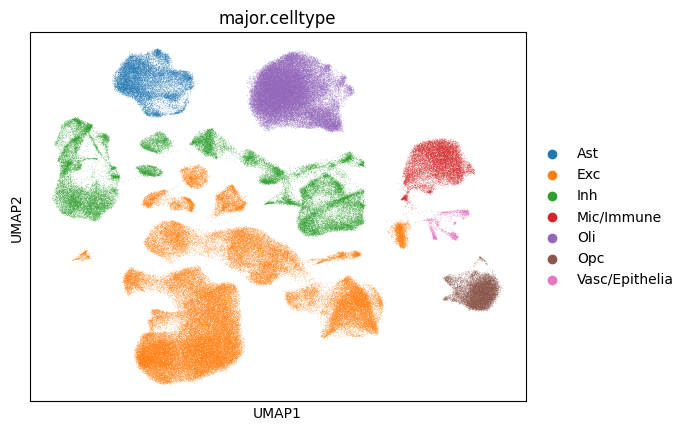

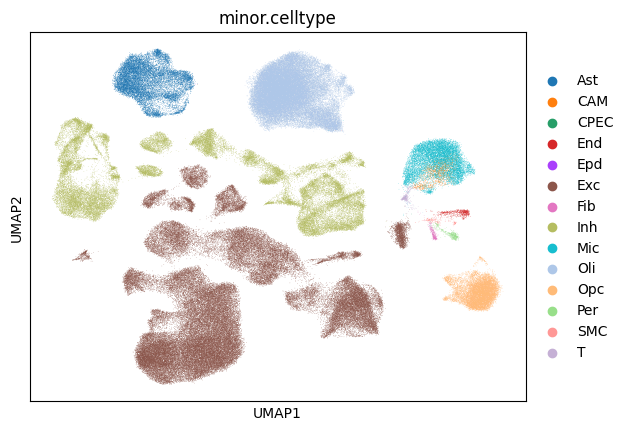

In [78]:
for colori in ["hcelltype","major.celltype","minor.celltype"]:
    sc.pl.umap(adata, color=colori)

In [80]:
adata.raw=None
adata.write("/gpfs/gibbs/project/zhao/xx244/NDreamer/case_control/data/ROSMAP.h5ad")